# Welcome to the project of drug discovery for PPCHEM

### The aim of the project will be to create and train a ML model to predict the activity of potential drug molecules. In order to do this, we used 2 regressor and 2 deep learning models to predict the pIC50 values of molecules. This approach is inspired by a ligand based approach which relies on the quantitative-structure-activity relationship (QSAR).

# 1. Installing the necessary packages and preparing the dataset

In [8]:
import numpy as np
import seaborn as sns
import rdkit

In [9]:
print(rdkit.__version__)

2023.09.6


In [10]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

### The dataset will be taken from the CHEMBL database, which is a database of bioactive molecules 

In [11]:
target = new_client.target
target_query = target.search('mTOR')
possible_targets = pd.DataFrame.from_dict(target_query)
possible_targets.head()

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P42346', 'xref_name': None, 'xre...",Rattus norvegicus,Serine/threonine-protein kinase mTOR,15.0,False,CHEMBL1075134,"[{'accession': 'P42346', 'component_descriptio...",SINGLE PROTEIN,10116
1,[],Mus musculus,Serine/threonine-protein kinase mTOR,15.0,False,CHEMBL1255165,"[{'accession': 'Q9JLN9', 'component_descriptio...",SINGLE PROTEIN,10090
2,[],Homo sapiens,DEPTOR/mTOR,15.0,False,CHEMBL4523674,"[{'accession': 'P42345', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
3,"[{'xref_id': 'P42345', 'xref_name': None, 'xre...",Homo sapiens,Serine/threonine-protein kinase mTOR,14.0,False,CHEMBL2842,"[{'accession': 'P42345', 'component_descriptio...",SINGLE PROTEIN,9606
4,"[{'xref_id': 'Q6R327', 'xref_name': None, 'xre...",Homo sapiens,Rapamycin-insensitive companion of mTOR,14.0,False,CHEMBL1795179,"[{'accession': 'Q6R327', 'component_descriptio...",SINGLE PROTEIN,9606


Lets choose the one concerning humans

In [12]:
target = possible_targets.target_chembl_id[3]
target

'CHEMBL2842'

### We will base the activity estimation on the IC50

In [13]:
activity = new_client.activity
res = activity.filter(target_chembl_id=target).filter(standard_type="IC50")
df = pd.DataFrame.from_dict(res)
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,866953,[],CHEMBL682171,The inhibitory activity by using FK506 binding...,B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase mTOR,9606,None,None,Log IC50,None,UO_0000065,None,-5.0
1,None,None,868131,[],CHEMBL682171,The inhibitory activity by using FK506 binding...,B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase mTOR,9606,None,None,Log IC50,None,UO_0000065,None,-5.0
2,None,None,873239,[],CHEMBL682171,The inhibitory activity by using FK506 binding...,B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase mTOR,9606,None,None,Log IC50,None,UO_0000065,None,-5.0
3,None,None,873240,[],CHEMBL677281,The inhibitory activity by using FK506 binding...,B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase mTOR,9606,None,None,Log IC50,None,UO_0000065,None,-8.5
4,None,None,875431,[],CHEMBL682171,The inhibitory activity by using FK506 binding...,B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase mTOR,9606,None,None,Log IC50,None,UO_0000065,None,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5173,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25044933,[],CHEMBL5245709,Inhibition of human mTOR,B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase mTOR,9606,None,None,IC50,nM,UO_0000065,None,0.1
5174,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25072205,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5253274,Inhibition of mTOR (unknown origin) incubated ...,B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase mTOR,9606,None,None,IC50,nM,UO_0000065,None,39.0
5175,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25072220,[],CHEMBL5253279,Inhibition of mTOR (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase mTOR,9606,None,None,IC50,nM,UO_0000065,None,2.4
5176,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25073472,[],CHEMBL5253692,Inhibition of mTOR (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase mTOR,9606,None,None,IC50,nM,UO_0000065,None,280.0


### The dataset needs to be cleaned from NaN and duplicates 

In [14]:
df_cleaned = df[df.standard_value.notna()]
df_cleaned = df_cleaned[df.canonical_smiles.notna()]
df_cleaned = df_cleaned.drop_duplicates(['canonical_smiles'])

df_cleaned



/var/folders/1w/7yxw4zjn49d6tn1hf1smspbm0000gn/T/ipykernel_47064/2338719627.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[df.canonical_smiles.notna()]


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,866953,[],CHEMBL682171,The inhibitory activity by using FK506 binding...,B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase mTOR,9606,None,None,Log IC50,None,UO_0000065,None,-5.0
1,None,None,868131,[],CHEMBL682171,The inhibitory activity by using FK506 binding...,B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase mTOR,9606,None,None,Log IC50,None,UO_0000065,None,-5.0
2,None,None,873239,[],CHEMBL682171,The inhibitory activity by using FK506 binding...,B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase mTOR,9606,None,None,Log IC50,None,UO_0000065,None,-5.0
3,None,None,873240,[],CHEMBL677281,The inhibitory activity by using FK506 binding...,B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase mTOR,9606,None,None,Log IC50,None,UO_0000065,None,-8.5
4,None,None,875431,[],CHEMBL682171,The inhibitory activity by using FK506 binding...,B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase mTOR,9606,None,None,Log IC50,None,UO_0000065,None,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5165,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25044914,[],CHEMBL5245700,Inhibition of mTOR (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase mTOR,9606,None,None,IC50,nM,UO_0000065,None,95.0
5168,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25044917,[],CHEMBL5245700,Inhibition of mTOR (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase mTOR,9606,None,None,IC50,nM,UO_0000065,None,16.0
5169,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25044918,[],CHEMBL5245700,Inhibition of mTOR (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase mTOR,9606,None,None,IC50,uM,UO_0000065,None,1.0
5170,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25044919,[],CHEMBL5245700,Inhibition of mTOR (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase mTOR,9606,None,None,IC50,uM,UO_0000065,None,1.0


Lets keep only the essential entries: Molecules CHEMBL ID, SMILES and IC50 values

In [15]:
df3 = df_cleaned[['molecule_chembl_id','canonical_smiles','standard_value']]
df3

has_nan = df3.isnull().values.any()
has_nan

False

### Lets chose our descriptors, let's begin with Lipinski descriptor and determine which one is active and which one is not 

In [16]:
from rdkit import Chem 
from rdkit.Chem import Descriptors, Lipinski


In [17]:
bioactivity = []
for i in df3.standard_value:
  if float(i) >= 10000:
    bioactivity.append(0) #inactive
  elif float(i) <= 1000:
    bioactivity.append(2) #active
  else:
    bioactivity.append(1) #depends

df3['Bioactivity'] = bioactivity
df3.reset_index(drop=True, inplace=True)
df3

has_nan = df3.isnull().values.any()
has_nan

/var/folders/1w/7yxw4zjn49d6tn1hf1smspbm0000gn/T/ipykernel_47064/632185739.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Bioactivity'] = bioactivity


False

In [18]:
def lipinski(smiles):
    molec = []
    for i in smiles:
        mol = Chem.MolFromSmiles(i) 
        molec.append(mol)

    MW = []
    LogP = []
    NHDonors = []
    NHAcceptors = []

    for n in molec:        
        MW.append(Descriptors.MolWt(n))
        LogP.append(Descriptors.MolLogP(n))
        NHDonors.append(Lipinski.NumHDonors(n))
        NHAcceptors.append(Lipinski.NumHAcceptors(n))
        
    desc_data = pd.DataFrame({
        "Mw": MW,
        "H donors": NHDonors,
        "H acceptors": NHAcceptors,
        "Log P": LogP
    })
    
    return desc_data


df_lipinski = pd.concat([df3, lipinski(df3.canonical_smiles)], axis = 1)
df_lipinski.standard_value

df_lipinski['standard_value'] = pd.to_numeric(df_lipinski['standard_value'], errors='coerce')


# Filter rows with numerical 'standard_value'
df_lipinski = df_lipinski.loc[pd.notna(df_lipinski['standard_value'])]
df_lipinski


,molecule_chembl_id,canonical_smiles,standard_value,Bioactivity,Mw,H donors,H acceptors,Log P
0,CHEMBL269775,CC(CN1CCCCC1)OC(=O)[C@@H]1CCCN1C(=O)C(=O)C(C)(C)C,10000.000,0,352.475,0,5,2.01020
1,CHEMBL6683,CC(CN1CCCCC1)OC(=O)[C@@H]1CCCN1C(=O)C(=O)c1ccccc1,10000.000,0,372.465,0,5,2.27790
2,CHEMBL7237,CC(C)CC(=O)C(=O)N1CCC[C@H]1C(=O)OCCCc1cccnc1,10000.000,0,346.427,0,5,2.16360
3,CHEMBL269732,C=CC[C@@H]1/C=C(\C)C[C@H](C)C[C@H](OC)[C@H]2O[...,3.162,2,804.031,3,12,4.63900
4,CHEMBL266660,CC(C)CC(=O)C(=O)N1CCC[C@H]1C(=O)OCCS(=O)(=O)c1...,10000.000,0,395.477,0,6,1.60970
...,...,...,...,...,...,...,...,...
4549,CHEMBL2333366,O=C(c1ccc(C(=O)C(F)(F)F)cc1)N1CCOc2ccc(-c3cnc4...,95.000,2,476.454,0,4,5.68160
4550,CHEMBL5274669,COc1ccc(C2Cc3c(C)nc(N)nc3N([C@H]3CC[C@H](OCCO)...,16.000,2,427.505,2,8,1.76382
4551,CHEMBL5276168,C[C@H]1COCCN1c1nc(-c2ccc(NC(=O)NCC(F)F)cc2)cc(...,1000.000,2,549.575,2,7,3.96490
4552,CHEMBL5271617,CCOC(=O)N1Cc2nc(-c3ccc(NC(=O)NC4CC4)cc3)nc(N3C...,1000.000,2,466.542,2,7,3.12470


### Now, lets change IC50 to pIC50 

In [19]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop(columns=['standard_value'])  # Drop the 'standard_value' column

    return x

def pIC50(input):
    if 'standard_value_norm' not in input.columns:
        raise ValueError("Column 'standard_value_norm' does not exist in the DataFrame.")

    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i * (10**-9)  # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop(columns=['standard_value_norm'])  # Drop the 'standard_value' column

    return x

# Apply the pIC50 function to df_lipinski
df_lipinski = norm_value(df_lipinski)
df_lipinski_pIC50 = pIC50(df_lipinski)
df_lipinski_pIC50

has_nan = df_lipinski_pIC50.isnull().values.any()
has_nan


False

### Now let's evaluate which variables determine the activity
### Hence, lets keep only the clearly active and clearly inactive compounds

In [20]:
df_visu = df_lipinski_pIC50[df_lipinski_pIC50['Bioactivity'].isin([0, 2])]
df_visu.reset_index(drop=True, inplace=True)
df_visu

,molecule_chembl_id,canonical_smiles,Bioactivity,Mw,H donors,H acceptors,Log P,pIC50
0,CHEMBL269775,CC(CN1CCCCC1)OC(=O)[C@@H]1CCCN1C(=O)C(=O)C(C)(C)C,0,352.475,0,5,2.01020,5.000000
1,CHEMBL6683,CC(CN1CCCCC1)OC(=O)[C@@H]1CCCN1C(=O)C(=O)c1ccccc1,0,372.465,0,5,2.27790,5.000000
2,CHEMBL7237,CC(C)CC(=O)C(=O)N1CCC[C@H]1C(=O)OCCCc1cccnc1,0,346.427,0,5,2.16360,5.000000
3,CHEMBL269732,C=CC[C@@H]1/C=C(\C)C[C@H](C)C[C@H](OC)[C@H]2O[...,2,804.031,3,12,4.63900,8.500038
4,CHEMBL266660,CC(C)CC(=O)C(=O)N1CCC[C@H]1C(=O)OCCS(=O)(=O)c1...,0,395.477,0,6,1.60970,5.000000
...,...,...,...,...,...,...,...,...
3982,CHEMBL2333366,O=C(c1ccc(C(=O)C(F)(F)F)cc1)N1CCOc2ccc(-c3cnc4...,2,476.454,0,4,5.68160,7.022276
3983,CHEMBL5274669,COc1ccc(C2Cc3c(C)nc(N)nc3N([C@H]3CC[C@H](OCCO)...,2,427.505,2,8,1.76382,7.795880
3984,CHEMBL5276168,C[C@H]1COCCN1c1nc(-c2ccc(NC(=O)NCC(F)F)cc2)cc(...,2,549.575,2,7,3.96490,6.000000
3985,CHEMBL5271617,CCOC(=O)N1Cc2nc(-c3ccc(NC(=O)NC4CC4)cc3)nc(N3C...,2,466.542,2,7,3.12470,6.000000


Text(0, 0.5, 'Frequency')

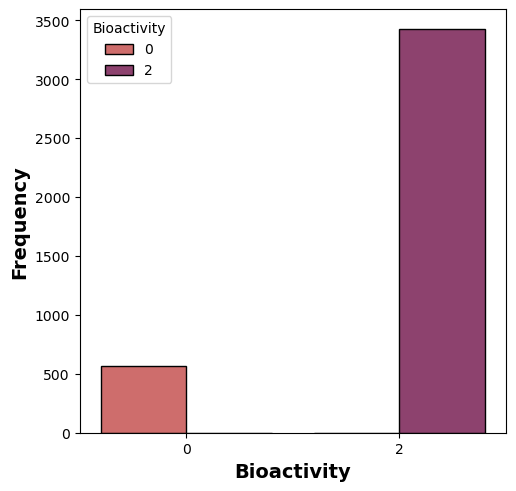

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5.5, 5.5))
#sns.color_palette("flare")
sns.countplot(x='Bioactivity', hue = 'Bioactivity', data=df_visu, edgecolor='black', palette = "flare")

plt.xlabel('Bioactivity', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

#plt.savefig('plot_bioactivity_class.pdf')

/Users/keliangaedecke/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/keliangaedecke/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/keliangaedecke/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/keliangaedecke/opt/anaconda3/envs/myenv/lib/python3.

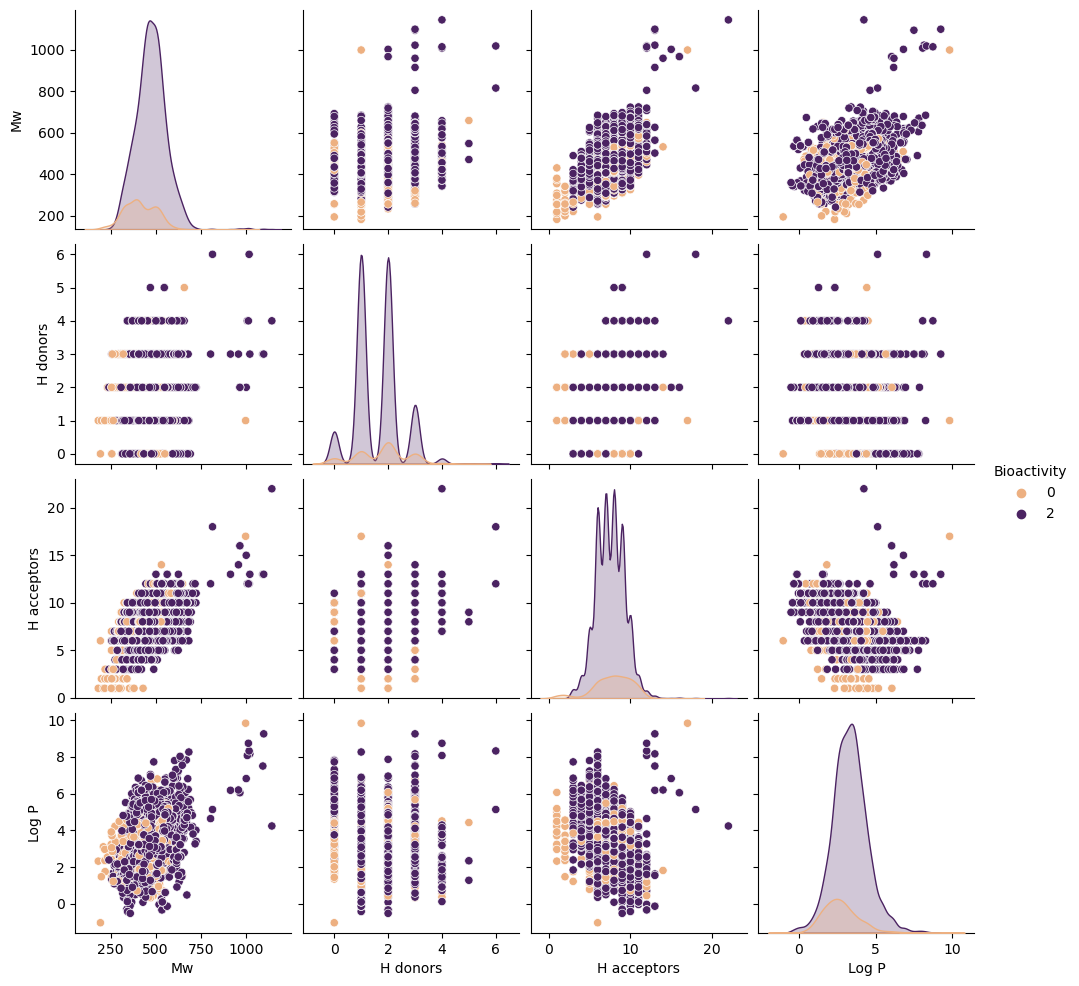

In [22]:
descriptors = ['Mw', 'H donors', 'H acceptors', 'Log P']
sns.pairplot(df_visu[descriptors + ['Bioactivity']], hue="Bioactivity", palette = "flare")

### Due to the fact no clear clusters are present, these plot show that we need a higher number of descriptors

### Lets increase the number of descriptor with rdkit:

In [24]:
def descriptors(smiles):
    mols = []

    for i in smiles:
        molec = Chem.MolFromSmiles(i)
        mols.append(molec)
    descrs = [Descriptors.CalcMolDescriptors(mol) for mol in mols]
    df_descr = pd.DataFrame(descrs)

    return df_descr
    

df_descr = descriptors(df_lipinski_pIC50.canonical_smiles)
df_descr = pd.concat([df_descr, df_lipinski_pIC50[['pIC50']]], axis=1)

# Let's replace infinities with NaN and then drop rows with any NaN values
df_descr.replace([np.inf, -np.inf], np.nan, inplace=True)
df_descr.dropna(inplace=True)

# Reset the index
df_descr.reset_index(drop=True, inplace=True)

df_descr 

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,pIC50
0,12.538627,12.538627,0.206973,-0.740395,0.559250,23.360000,352.475,320.219,352.236208,142,...,0,0,0,0,0,0,0,0,0,5.000000
1,12.625455,12.625455,0.224095,-0.658363,0.435376,21.666667,372.465,344.241,372.204907,146,...,0,0,0,0,0,0,0,0,0,5.000000
2,12.276559,12.276559,0.122158,-0.623144,0.409500,16.920000,346.427,320.219,346.189257,136,...,0,0,0,0,0,0,0,1,0,5.000000
3,14.305087,14.305087,0.009882,-2.510254,0.184956,40.964912,804.031,734.479,803.481977,322,...,0,0,0,0,0,0,0,0,0,8.500038
4,12.305108,12.305108,0.053378,-3.548133,0.489914,17.148148,395.477,370.277,395.140259,148,...,0,1,0,0,0,0,0,0,0,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4549,13.094935,13.094935,0.196350,-4.962669,0.357104,13.628571,476.454,457.302,476.134777,176,...,0,0,0,0,0,0,0,0,0,7.022276
4550,13.719944,13.719944,0.010827,-0.360932,0.714763,23.516129,427.505,398.273,427.221954,166,...,0,0,0,0,0,0,0,0,0,7.795880
4551,14.263078,14.263078,0.062903,-3.705518,0.429069,15.947368,549.575,523.367,549.165760,202,...,0,1,0,0,0,0,0,0,1,6.000000
4552,12.399269,12.399269,0.160925,-0.344512,0.696831,19.529412,466.542,436.302,466.232853,180,...,0,0,0,0,0,0,0,0,1,6.000000


lets choose the most relevent features:

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    

Now lets test out some models
We must always use 'scaler.transform(X_train)' on the 'X_test'
R/: Lets not that as we have a lot of features, the methods using 'distance' as KNN suffer from the high dimension curse

# 2. Model Building 

### The aim of this section will be to call and train models in order to predict the bioactivity of small molecules via a prediction of their pIC50 values. To do this, two regressor models and one DL model were used. 

## 2.1 Data preparation

In [26]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn import preprocessing
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))


### The X, Y variable matrixes are created and we look to fit_transform the X set
### We see that somes features have been dropped 

In [27]:
#remove the pIC50 column
X = df_descr.drop('pIC50', axis=1)
X1 = X

X = selection.fit_transform(X)
X_df = pd.DataFrame(X)

Y = df_descr['pIC50']


X1.shape, X_df.shape, Y.shape



((4554, 210), (4554, 126), (4554,))

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y, test_size=0.2)

X_train.shape, Y_train.shape
X_test.shape, Y_test.shape



In [ ]:
np.random.seed(100) 
#allows to fixate the model prediction performance (score) after first attempt 
#done by fixing the random number generation

In [ ]:
#define function !!! Under construction !!!

def split_data(X, Y):
    """
    
    Split the data and train and test 
    
    """
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    return X_train, X_test, Y_train, Y_test

    
    

## 2.2 RandomForest Model

### Random Forest is an ensemble learning method used for classification and regression tasks. The mode of operation of this model is the construction of random decision trees during the training time.

### 2.2.1 Model Contruction

In [ ]:
model_rf = RandomForestRegressor(n_estimators=100)
model_rf.fit(X_train, Y_train)

Y_pred = model_rf.predict(X_test)

# Returns the R^2 value of the regression
r2_rf = model_rf.score(X_test, Y_test)
print(f"The score test of the RandomForest Model is R^2 ={r2_rf}")

# Some other evaluation metrics
mse_rf = mean_squared_error(Y_test, Y_pred)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(Y_test, Y_pred)

# Cross-Validation
cv_scores_rf = cross_val_score(model_rf, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE: {np.mean(-cv_scores_rf)}")

explained_variance_rf = explained_variance_score(Y_test, Y_pred)

print(f"The metrics calculated for the RF model are MSE: {mse_rf}, RMSE: {rmse_rf}, MAE: {mae_rf}, R^2: {r2_rf}, Explained Variance: {explained_variance_rf}")




### 2.2.2 Hyper paramter tuning
### Let's try to tune the hyper paramters of the model with RandomizedSearch - This functions allows to try random combinations of parameters and will output the most suited paramters for the model 

In [94]:
from sklearn.model_selection import RandomizedSearchCV

# We define here the parameter distribution
param_distributions = {
    'n_estimators': [10, 30, 50, 100, 150, 200],
    'max_depth': [None, 2, 16, 32, 48, 64],
    'min_samples_split': [2, 5, 7, 9, 12],
    'min_samples_leaf': [1, 2, 4, 6, 7]
}

# Initialize the model
model_rf2 = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model_rf2, param_distributions=param_distributions, n_iter=25, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)

# Fit the model
random_search.fit(X_train, Y_train)

# Best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")

Best parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}
Best score: -0.4773528769785254


### The random search function allowed to discover more suited hyperparameters for RF model. With the previous output, Let's create a new model with tuned hyper parameters

In [95]:
# Best parameters found from RandomizedSearchCV
opt_params = {
    'n_estimators': 100,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'max_depth': None  
}


model_rf2 = RandomForestRegressor(**opt_params, random_state=42)

# Assuming X_train and Y_train are your training data and labels
model_rf2.fit(X_train, Y_train)

Y_pred_2 = model_rf.predict(X_test)


# Returns the R^2 value of the regression
r2_rf2 = model_rf2.score(X_test, Y_test)
print(f"The score test of the optimized RandomForest Model is R^2 ={r2_rf2}")

# Some other evaluation metrics
mse_rf2 = mean_squared_error(Y_test, Y_pred_2)
rmse_rf2 = np.sqrt(mse_rf2)
mae_rf2 = mean_absolute_error(Y_test, Y_pred_2)

# Cross-Validation
cv_scores_rf2 = cross_val_score(model_rf, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE: {np.mean(-cv_scores_rf2)}")

explained_variance_rf2 = explained_variance_score(Y_test, Y_pred_2)

print(f"The metrics calculated for the RF model are MSE: {mse_rf2}, RMSE: {rmse_rf2}, MAE: {mae_rf2}, R^2: {r2_rf2}, Explained Variance: {explained_variance_rf2}")





The score test of the optimized RandomForest Model is R^2 =0.7238610871576535
Cross-Validation MSE: 0.4809263660618325
The metrics calculated for the RF model are MSE: 0.4676882891607885, RMSE: 0.6838773933687152, MAE: 0.4991804782150994, R^2: 0.7238610871576535, Explained Variance: 0.7208391698364529


## Let's try to compare if the new model has better performances 

In [96]:
metrics1 = {'MSE' : mse_rf, 'RMSE' : rmse_rf, 'MAE' : mae_rf, 'R^2' : r2_rf, 'explained_variance' : explained_variance_rf}
metrics2 = {'MSE' : mse_rf2, 'RMSE' : rmse_rf2, 'MAE' : mae_rf2, 'R^2' : r2_rf2, 'explained_variance' : explained_variance_rf2}

for met in metrics2:
    ini_value = metrics1[met]
    fin_value = metrics2[met]
    
    [met]
    diff = fin_value - ini_value
    percentage_change = (diff / ini_value) * 100
 
    if diff < 0:
        print(f"{met} decreased by {-diff} (or {-percentage_change:.2f}%) from {ini_value} to {fin_value}")
    else:
        print(f"{met} increased by {diff} (or {percentage_change:.2f}%) from {ini_value} to {fin_value}")




MSE increased by 0.0 (or 0.00%) from 0.4676882891607885 to 0.4676882891607885
RMSE increased by 0.0 (or 0.00%) from 0.6838773933687152 to 0.6838773933687152
MAE increased by 0.0 (or 0.00%) from 0.4991804782150994 to 0.4991804782150994
R^2 increased by 0.004105836003334473 (or 0.57%) from 0.719755251154319 to 0.7238610871576535
explained_variance increased by 0.0 (or 0.00%) from 0.7208391698364529 to 0.7208391698364529


### 2.2.3 Performance Visualisation

### The plots used are:  
### 1. a scatter plot of the predicted vs the experimental pIC50
### 2. a bar plot of features in function of their importance for the prediction
### 3. a scatter plot of the residual vs the predicted values 
### 4. a plot of the learning curve of the model

/Users/davidsegura/miniconda3/envs/ppchem/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


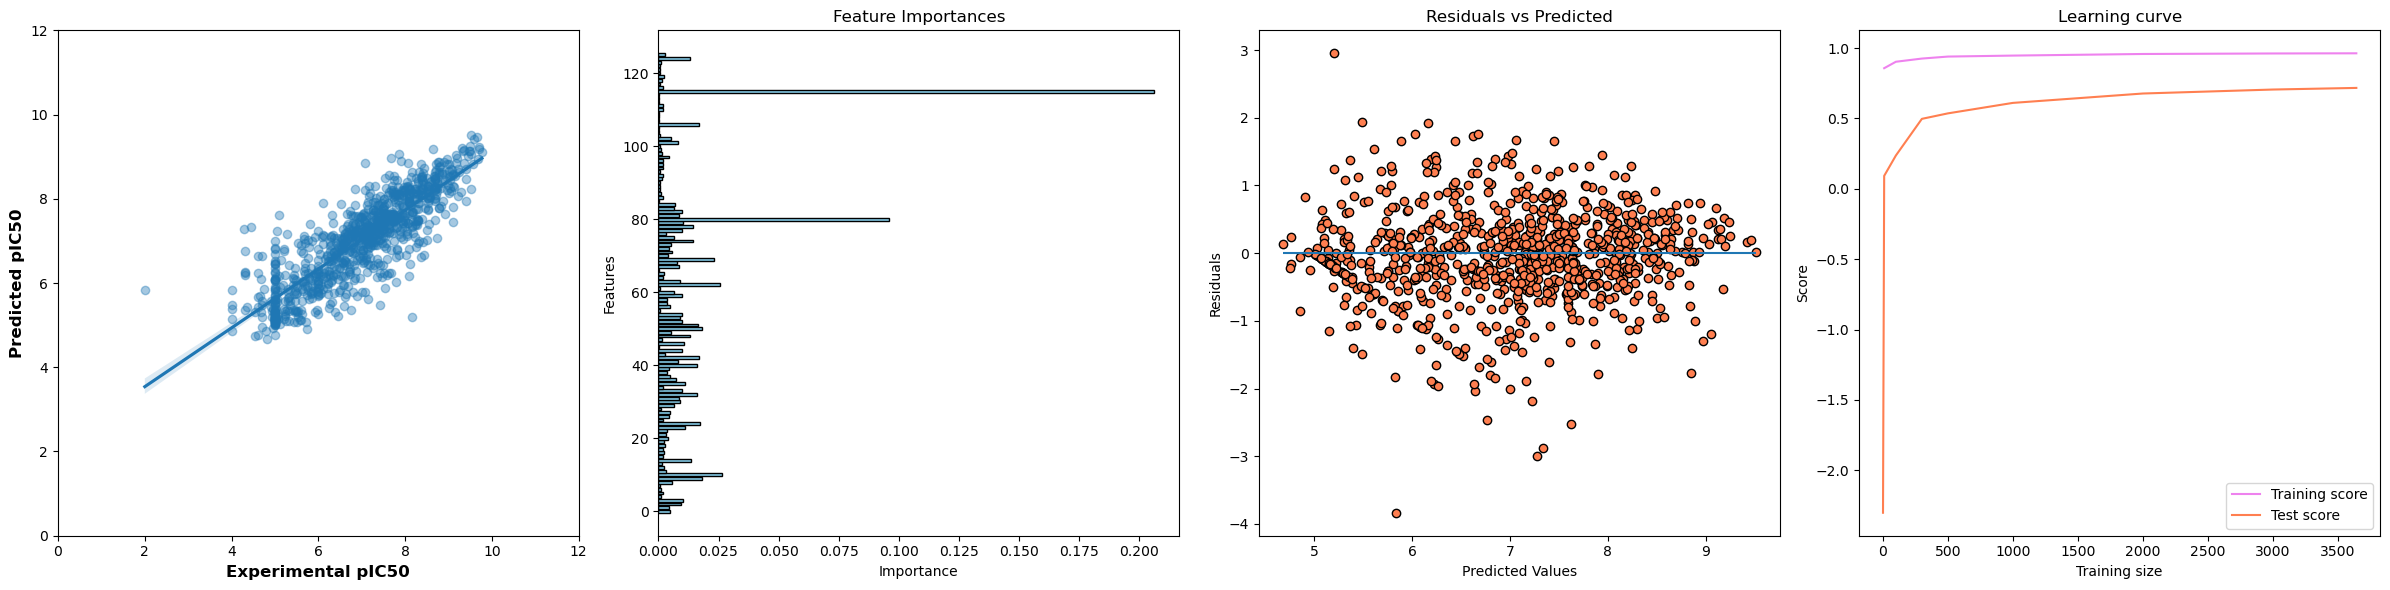

In [101]:
fig, axs = plt.subplots(1, 4, figsize=(24, 6))  # Adjust the figure size as needed

# Plot 1: Regplot of Predicted vs Experimental pIC50
sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4}, ax=axs[0])
axs[0].set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
axs[0].set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
axs[0].set_xlim(0, 12)
axs[0].set_ylim(0, 12)

# Plot 2: Feature Importances
feature_importances = model_rf.feature_importances_
axs[1].barh(range(len(feature_importances)), feature_importances, edgecolor='black', color='skyblue')
axs[1].set_xlabel('Importance')
axs[1].set_ylabel('Features')
axs[1].set_title('Feature Importances')

# Plot 3: Residuals vs Predicted
residuals = Y_test - Y_pred
axs[2].scatter(Y_pred, residuals, edgecolor='black', color='coral')
axs[2].hlines(y=0, xmin=Y_pred.min(), xmax=Y_pred.max())
axs[2].set_xlabel('Predicted Values')
axs[2].set_ylabel('Residuals')
axs[2].set_title('Residuals vs Predicted')

# Plot 4: Learning Curve
train_sizes = [1, 10, 100, 300, 500, 1000, 2000, 3000, len(X_train)-1]
train_scores = []
test_scores = []

for train_size in train_sizes:
    X_slice, _, y_slice, _ = train_test_split(X_train, Y_train, train_size=train_size, random_state=42)
    model_rf.fit(X_slice, y_slice)
    train_scores.append(model_rf.score(X_slice, y_slice))
    test_scores.append(model_rf.score(X_test, Y_test))

axs[3].plot(train_sizes, train_scores, label='Training score', color = 'violet')
axs[3].plot(train_sizes, test_scores, label='Test score', color = 'coral')
axs[3].set_xlabel('Training size')
axs[3].set_ylabel('Score')
axs[3].legend()
axs[3].set_title('Learning curve')

plt.tight_layout()  
plt.show()



## 2.3 Gradient Boosting Machines (GBMs)

### Gradient Boosting Machines (GBMs) is a machine learning model suited for regression and classification tasks. The model is built on the principle of sequential learning, where the model gets boosted as weak decision tree learners are sequentially added to corrects previous errors.



### 2.3.1 Model Construction 

In [102]:
from sklearn.ensemble import GradientBoostingRegressor

In [103]:

X_train.shape, Y_train.shape
X_test.shape, Y_test.shape

model_gbm = GradientBoostingRegressor(n_estimators=100, random_state=42)

model_gbm.fit(X_train, Y_train)

Y_pred_gbm = model_gbm.predict(X_test)

# Returns the R^2 value of the regression
r2_gbm = model_gbm.score(X_test, Y_test)
print(f"The score test of the Gradient Boosting Machines is R^2 ={r2_gbm}")


# Some other evaluation metrics
mse_gbm = mean_squared_error(Y_test, Y_pred_gbm)
rmse_gbm = np.sqrt(mse_gbm)
mae_gbm = mean_absolute_error(Y_test, Y_pred_gbm)

# Cross-Validation
cv_scores_gbm = cross_val_score(model_gbm, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE: {np.mean(-cv_scores_gbm)}")

explained_variance_gbm = explained_variance_score(Y_test, Y_pred_gbm)

print(f"The metrics calculated for the RF model are MSE: {mse_gbm}, RMSE: {rmse_gbm}, MAE: {mae_gbm}, R^2: {r2_gbm}, Explained Variance: {explained_variance_gbm}")




The score test of the Gradient Boosting Machines is R^2 =0.6579801709150965
Cross-Validation MSE: 0.5615953554682495
The metrics calculated for the RF model are MSE: 0.570782037424959, RMSE: 0.7555011829408071, MAE: 0.5741686719549475, R^2: 0.6579801709150965, Explained Variance: 0.6580811449762523


### 2.3.3 Hyper parameter tuning 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

In [ ]:
param_dist = {
    "n_estimators": sp_randint(100, 300),  
    "learning_rate": uniform(0.01, 0.1),  
    "max_depth": sp_randint(3, 5),  
    "min_samples_split": sp_randint(2, 6),
    "min_samples_leaf": sp_randint(1, 4),
    "subsample": uniform(0.7, 0.3)  
}

# Initialize the base model
model_gbm2 = GradientBoostingRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(model_gbm2, param_distributions=param_dist,
                                   n_iter=10, cv=3, random_state=42, scoring='neg_mean_squared_error')

random_search.fit(X_train, Y_train)

print("Best parameters found: ", random_search.best_params_)
print("Best score found: ", random_search.best_score_)

#best_gbm = random_search.best_estimator_

In [ ]:
best_params = {'learning_rate': 0.10385527090157502, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 157, 'subsample': 0.8574269294896713}

model_gbm2 = GradientBoostingRegressor(**best_params, random_state=42)

model_gbm2.fit(X_train, Y_train)

Y_pred_gbm2 = model_gbm2.predict(X_test)

# Returns the R^2 value of the regression
r2_gbm2 = model_gbm2.score(X_test, Y_test)
print(f"The score test of the Gradient Boosting Machines is R^2 ={r2_gbm2}")


# Some other evaluation metrics
mse_gbm2 = mean_squared_error(Y_test, Y_pred_gbm2)
rmse_gbm2 = np.sqrt(mse_gbm2)
mae_gbm2 = mean_absolute_error(Y_test, Y_pred_gbm2)

# Cross-Validation
cv_scores_gbm2 = cross_val_score(model_gbm2, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE: {np.mean(-cv_scores_gbm2)}")

explained_variance_gbm2 = explained_variance_score(Y_test, Y_pred_gbm2)

print(f"The metrics calculated for the RF model are MSE: {mse_gbm2}, RMSE: {rmse_gbm2}, MAE: {mae_gbm2}, R^2: {r2_gbm2}, Explained Variance: {explained_variance_gbm2}")


### Performance change in % after tuning the hyperparameters 


In [107]:
metrics1 = {'MSE' : mse_gbm, 'RMSE' : rmse_gbm, 'MAE' : mae_gbm, 'R^2' : r2_gbm, 'explained_variance' : explained_variance_gbm}
metrics2 = {'MSE' : mse_gbm2, 'RMSE' : rmse_gbm2, 'MAE' : mae_gbm2, 'R^2' : r2_gbm2, 'explained_variance' : explained_variance_gbm2}

for met in metrics2:
    ini_value = metrics1[met]
    fin_value = metrics2[met]
    
    [met]
    diff = fin_value - ini_value
    percentage_change = (diff / ini_value) * 100
 
    if diff < 0:
        print(f"{met} decreased by {-diff} (or {-percentage_change:.2f}%) from {ini_value} to {fin_value}")
    else:
        print(f"{met} increased by {diff} (or {percentage_change:.2f}%) from {ini_value} to {fin_value}")


MSE decreased by 0.08628179607463698 (or 15.12%) from 0.570782037424959 to 0.48450024135032205
RMSE decreased by 0.05944066736021336 (or 7.87%) from 0.7555011829408071 to 0.6960605155805938
MAE decreased by 0.06035887290990549 (or 10.51%) from 0.5741686719549475 to 0.513809799045042
R^2 increased by 0.05170114546652238 (or 7.86%) from 0.6579801709150965 to 0.7096813163816189
explained_variance increased by 0.05177502479501117 (or 7.87%) from 0.6580811449762523 to 0.7098561697712634


### 2.3.2 Performance Visualisation 



/Users/davidsegura/miniconda3/envs/ppchem/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


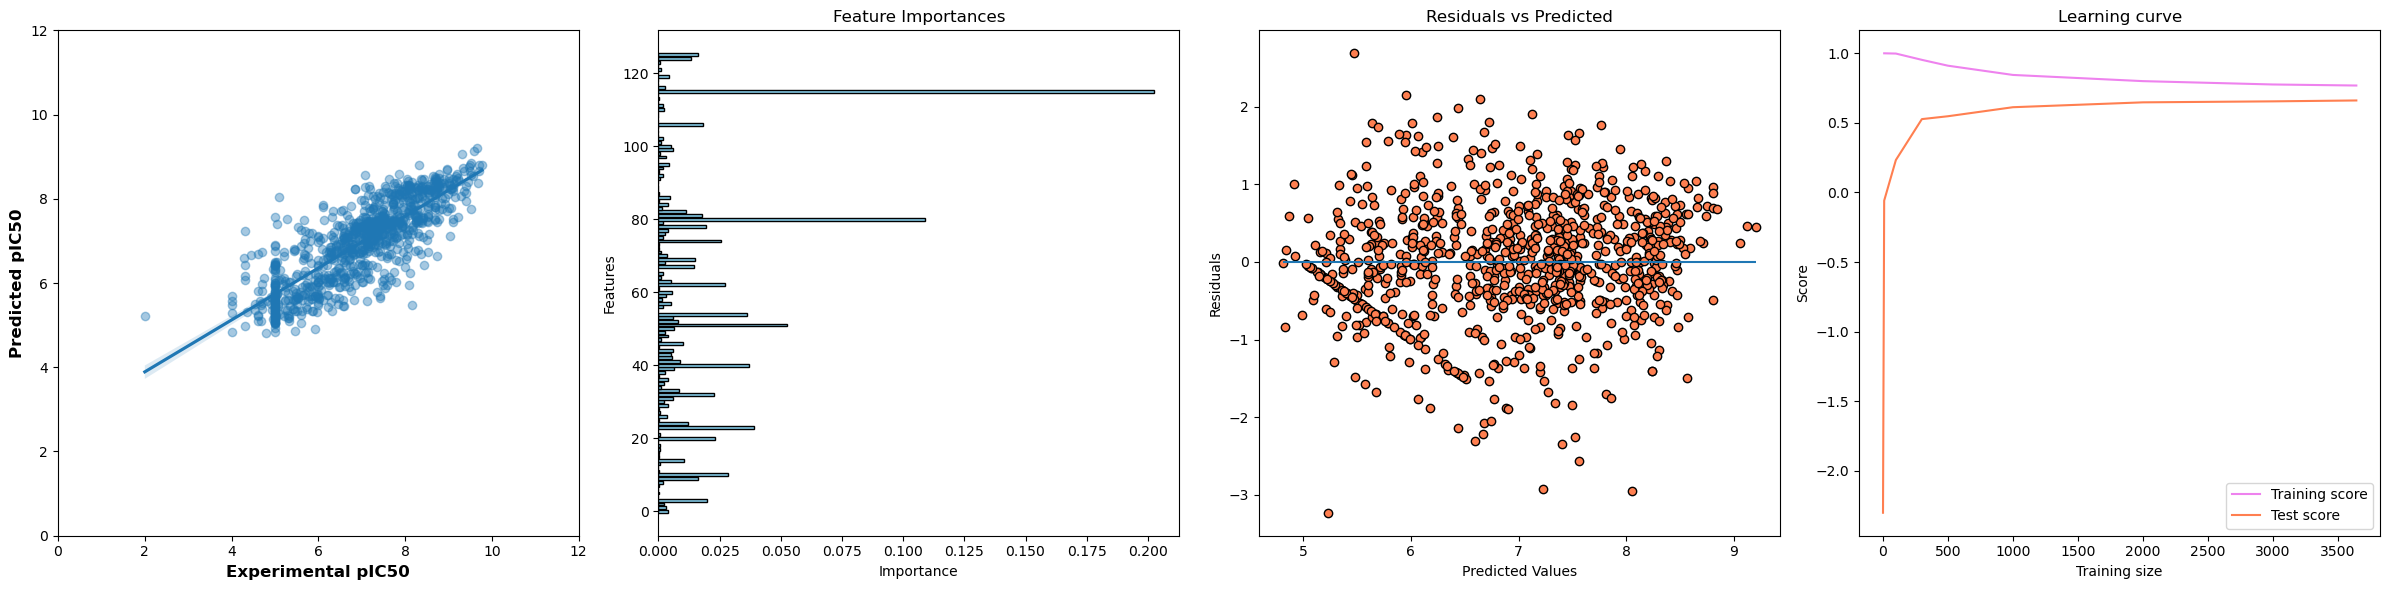

In [109]:
fig, axs = plt.subplots(1, 4, figsize=(24, 6))  # Adjust the figure size as needed

# Plot 1: Regplot of Predicted vs Experimental pIC50
sns.regplot(x=Y_test, y=Y_pred_gbm, scatter_kws={'alpha':0.4}, ax=axs[0])
axs[0].set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
axs[0].set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
axs[0].set_xlim(0, 12)
axs[0].set_ylim(0, 12)

# Plot 2: Feature Importances
feature_importances = model_gbm.feature_importances_
axs[1].barh(range(len(feature_importances)), feature_importances, edgecolor='black', color='skyblue')
axs[1].set_xlabel('Importance')
axs[1].set_ylabel('Features')
axs[1].set_title('Feature Importances')

# Plot 3: Residuals vs Predicted
residuals = Y_test - Y_pred_gbm
axs[2].scatter(Y_pred_gbm, residuals, edgecolor='black', color='coral')
axs[2].hlines(y=0, xmin=Y_pred_gbm.min(), xmax=Y_pred_gbm.max())
axs[2].set_xlabel('Predicted Values')
axs[2].set_ylabel('Residuals')
axs[2].set_title('Residuals vs Predicted')

# Plot 4: Learning Curve
train_sizes = [1, 10, 100, 300, 500, 1000, 2000, 3000, len(X_train)-1]
train_scores = []
test_scores = []

for train_size in train_sizes:
    X_slice, _, y_slice, _ = train_test_split(X_train, Y_train, train_size=train_size, random_state=42)
    model_gbm.fit(X_slice, y_slice)
    train_scores.append(model_gbm.score(X_slice, y_slice))
    test_scores.append(model_gbm.score(X_test, Y_test))

axs[3].plot(train_sizes, train_scores, label='Training score', color = 'violet')
axs[3].plot(train_sizes, test_scores, label='Test score', color = 'coral')
axs[3].set_xlabel('Training size')
axs[3].set_ylabel('Score')
axs[3].legend()
axs[3].set_title('Learning curve')

plt.tight_layout()  
plt.show()




## 2.4 Fully Connected (Dense) Neural Network

### Fully Connected Neural Network is a type of artificial neural network where every neuron in one layer is connected to every neuron in the next layer. 


In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler


### 2.4.1 Model Contruction

In [111]:
# The NN cannot fit in the case of excessive values, let's apply a scaling function
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# This will get the number of features / descriptors in the dataset 
num_features = X_train_scaled.shape[1]  

model_nn = Sequential([
    Dense(128, activation='relu', input_shape=(num_features,)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')  # Output layer for regression
])

model_nn.compile(optimizer='adam', loss='mean_squared_error')


history = model_nn.fit(X_train_scaled, Y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, Y_test))






Epoch 1/100


/Users/davidsegura/miniconda3/envs/ppchem/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 13.1740 - val_loss: 1.4076
Epoch 2/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - loss: 2.3792 - val_loss: 1.1387
Epoch 3/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - loss: 1.9134 - val_loss: 0.9305
Epoch 4/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - loss: 1.6544 - val_loss: 0.9113
Epoch 5/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - loss: 1.7094 - val_loss: 0.8441
Epoch 6/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 1.5018 - val_loss: 0.8208
Epoch 7/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - loss: 1.3871 - val_loss: 0.7938
Epoch 8/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - loss: 1.3434 - val_loss: 0.8343
Epoch 9/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 1.3359 - val_loss: 0.8117
Epoch 10/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - loss: 1.2520 - val_loss: 0.7110
Epoch 11/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - loss: 1.2227 - val_loss: 0.7601
Epoch 12/100
114/114 ━━━━━━━━━

### Let's try to find the validation loss on the NN model

In [112]:
val_loss = model_nn.evaluate(X_test_scaled, Y_test)
print(f"Validation loss: {val_loss}")

Y_pred_nn = model_nn.predict(X_test_scaled)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - loss: 0.4471
Validation loss: 0.4600508213043213
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step


Let's evalute the performances with other metrics 

In [113]:
mse_nn = mean_squared_error(Y_test, Y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
mae_nn = mean_absolute_error(Y_test, Y_pred_nn)
r2_nn = r2_score(Y_test, Y_pred_nn)
explained_variance_nn = explained_variance_score(Y_test, Y_pred_nn)


print(f"The metrics calculated for the NN model are MSE: {mse_nn}, RMSE: {rmse_nn}, MAE: {mae_nn}, R^2: {r2_nn}, Explained Variance: {explained_variance_nn}")


The metrics calculated for the NN model are MSE: 0.46470595249495866, RMSE: 0.6816934446618647, MAE: 0.5088362667623787, R^2: 0.7215423050730486, Explained Variance: 0.7219767456055448


### 2.4.2 Hyper parameter tuning

In [114]:
import keras_tuner as kt


In [115]:
# This function will take hyperparameters as input and outputs a model

def create_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_input', min_value=32, max_value=512, step=32),
                    activation='relu', input_shape=(X_train_scaled.shape[1],)))
    for i in range(hp.Int('n_layers', 1, 3)):
        model.add(Dense(units=hp.Int(f'units_layer_{i}', min_value=32, max_value=512, step=32),
                        activation='relu'))
        model.add(Dropout(rate=hp.Float('dropout_'+str(i), min_value=0.0, max_value=0.5, default=0.2, step=0.1)))
    model.add(Dense(1, activation='linear'))
    
    model.compile(optimizer=hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd']),
                  loss='mean_squared_error',
                  metrics=['mean_squared_error'])
    
    return model

In [116]:
# Let's use on of the function on the keras-tuner package to find the optimal hyper parameters with RandomSearch tool
tuner = kt.RandomSearch(create_model,
                        objective='val_mean_squared_error',
                        max_trials=10,  # Number of trials to run
                        executions_per_trial=1,  # Number of models to train for each trial
                        directory='my_dir',  # Directory to store logs
                        project_name='keras_tuner_demo')

tuner.search(X_train_scaled, Y_train, epochs=10, validation_split=0.1)

Reloading Tuner from my_dir/keras_tuner_demo/tuner0.json


In [117]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hp
model_nn2 = tuner.hypermodel.build(best_hps)

# Train the best model
history = model_nn2.fit(X_train_scaled, Y_train, epochs=50, validation_split=0.1)

Y_pred_nn2 = model_nn2.predict(X_test_scaled)

# Evaluate on test data
val_loss2 = model_nn2.evaluate(X_test_scaled, Y_test)
print(f"Validation loss: {val_loss2}")

mse_nn2 = mean_squared_error(Y_test, Y_pred_nn2)
rmse_nn2 = np.sqrt(mse_nn2)
mae_nn2 = mean_absolute_error(Y_test, Y_pred_nn2)
r2_nn2 = r2_score(Y_test, Y_pred_nn2)
explained_variance_nn2 = explained_variance_score(Y_test, Y_pred_nn2)


print(f"The metrics calculated for the NN model are MSE: {mse_nn2}, RMSE: {rmse_nn2}, MAE: {mae_nn2}, R^2: {r2_nn2}, Explained Variance: {explained_variance_nn2}")


Epoch 1/50


/Users/davidsegura/miniconda3/envs/ppchem/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13.5238 - mean_squared_error: 13.5241 - val_loss: 1.8794 - val_mean_squared_error: 1.9169
Epoch 2/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - loss: 1.8382 - mean_squared_error: 1.8382 - val_loss: 1.4123 - val_mean_squared_error: 1.4112
Epoch 3/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 1.5163 - mean_squared_error: 1.5162 - val_loss: 1.2634 - val_mean_squared_error: 1.2770
Epoch 4/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - loss: 1.1834 - mean_squared_error: 1.1834 - val_loss: 1.0398 - val_mean_squared_error: 1.0582
Epoch 5/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - loss: 1.0579 - mean_squared_error: 1.0580 - val_loss: 0.9038 - val_mean_squared_error: 0.9250
Epoch 6/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.9286 - mean_squared_error: 0.9286 - val_loss: 0.9349 - val_mean_squared_error: 0.9520
Epoch 7/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 0.8863 - mean_squared_error: 0.8862 - val_loss: 0

In [118]:
metrics1 = {'MSE' : mse_nn, 'RMSE' : rmse_nn, 'MAE' : mae_nn, 'R^2' : r2_nn, 'explained_variance' : explained_variance_nn }
metrics2 = {'MSE' : mse_nn2, 'RMSE' : rmse_nn2, 'MAE' : mae_nn2, 'R^2' : r2_nn2, 'explained_variance' : explained_variance_nn2 }

for met in metrics2:
    ini_value = metrics1[met]
    fin_value = metrics2[met]
    
    [met]
    diff = fin_value - ini_value
    percentage_change = (diff / ini_value) * 100
 
    if diff < 0:
        print(f"{met} decreased by {-diff} (or {-percentage_change:.2f}%) from {ini_value} to {fin_value}")
    else:
        print(f"{met} increased by {diff} (or {percentage_change:.2f}%) from {ini_value} to {fin_value}")

print(f"Also validation losses went from {val_loss} to {val_loss2}")

MSE increased by 0.0022635433575703967 (or 0.49%) from 0.46470595249495866 to 0.46696949585252906
RMSE increased by 0.0016582187242202284 (or 0.24%) from 0.6816934446618647 to 0.6833516633860849
MAE increased by 0.00556364425679956 (or 1.09%) from 0.5088362667623787 to 0.5143999110191783
R^2 decreased by 0.001356343860740794 (or 0.19%) from 0.7215423050730486 to 0.7201859612123078
explained_variance increased by 0.0015577215195357041 (or 0.22%) from 0.7219767456055448 to 0.7235344671250805
Also validation losses went from 0.4600508213043213 to [0.4651065170764923, 0.4669695198535919]


# NN - Model

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn import preprocessing
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))  
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df_descr.drop('pIC50', axis=1)
X = selection.fit_transform(X)
y = df_descr['pIC50']

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# Assuming you have already loaded and preprocessed your data
# X contains the features, and y contains the pIC50 values
# Make sure X is a numpy array of shape (number of samples, number of features)
# Make sure y is a numpy array of shape (number of samples,)

# Scale the input features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert data to PyTorch tensors
X_scaled = torch.tensor(X_scaled, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define a custom FNN model for regression
class FNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2):
        super(FNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
input_size = X_train.shape[1]
hidden_size1 = 196
hidden_size2 = 110
model = FNN(input_size, hidden_size1, hidden_size2)

# Define loss function and optimizer for regression
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr= 0.001)

# Convert data to PyTorch DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Lists to store training loss, test loss, and R^2 score at each epoch
train_losses = []
test_losses = []
r2_scores = []

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    epoch_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.unsqueeze(1))
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * inputs.size(0)
    
    epoch_loss /= len(train_loader.dataset)
    train_losses.append(epoch_loss)
    
    # Calculate test loss and R^2 score
    with torch.no_grad():
        y_pred = model(X_test)
        test_loss = criterion(y_pred, y_test.unsqueeze(1))
        test_losses.append(test_loss.item())
        r2 = r2_score(y_test.numpy(), y_pred.numpy())
        r2_scores.append(r2)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Test Loss: {test_loss:.4f}, R^2 Score: {r2:.4f}")

# Plot the training loss, test loss, and R^2 score
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), r2_scores, label='R^2 Score', color='green')
plt.xlabel('Epoch')
plt.ylabel('R^2 Score')
plt.title('R^2 Score over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
with torch.no_grad():
    outputs = model(X_test)
    loss = criterion(outputs, y_test.unsqueeze(1))
    print(f"Test Loss: {loss.item():.4f}")

In [83]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint

# Assuming you have already loaded and preprocessed your data
# X contains the features, and y contains the pIC50 values
# Make sure X is a numpy array of shape (number of samples, number of features)
# Make sure y is a numpy array of shape (number of samples,)

# Scale the input features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert data to PyTorch tensors
X_scaled = torch.tensor(X_scaled, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define a custom FNN model for regression
class FNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2):
        super(FNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def train_model(X_train, y_train, X_val, y_val, input_size, hidden_size1, hidden_size2, num_epochs=100, lr=0.001):
    # Instantiate the model
    model = FNN(input_size, hidden_size1, hidden_size2)

    # Define loss function and optimizer for regression
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Convert data to PyTorch DataLoader
    train_dataset = TensorDataset(X_train, y_train)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

    # Train the model
    for epoch in range(num_epochs):
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.unsqueeze(1))
            loss.backward()
            optimizer.step()

    # Evaluate the model on the validation set
    with torch.no_grad():
        outputs = model(X_val)
        val_loss = criterion(outputs, y_val.unsqueeze(1))
        val_r2 = r2_score(y_val.numpy(), outputs.numpy())
    
    return val_loss.item(), val_r2

# Define the search space for hyperparameters
param_dist = {
    'hidden_size1': sp_randint(64, 256),
    'hidden_size2': sp_randint(32, 128),
    'lr': [0.0001, 0.0005, 0.001, 0.005, 0.01]
}

# Number of random samples
n_iter_search = 20

best_val_loss = float('inf')
best_hyperparams = None

for i in range(n_iter_search):
    # Sample hyperparameters from the search space
    hyperparams = {key: np.random.choice(value) if isinstance(value, list) else value.rvs() for key, value in param_dist.items()}
    
    # Train and evaluate the model with the sampled hyperparameters
    val_loss, val_r2 = train_model(X_train, y_train, X_test, y_test, X_train.shape[1], **hyperparams)
    
    print(f"Iteration {i+1}/{n_iter_search}: Validation Loss: {val_loss:.4f}, R^2 Score: {val_r2:.4f}, Hyperparameters: {hyperparams}")
    
    # Update the best hyperparameters if the validation loss improves
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_hyperparams = hyperparams

print(f"Best Hyperparameters: {best_hyperparams}")

ModuleNotFoundError: No module named 'torch'

In [84]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# Assuming you have already loaded and preprocessed your data
# X contains the features, and y contains the pIC50 values
# Make sure X is a numpy array of shape (number of samples, number of features)
# Make sure y is a numpy array of shape (number of samples,)

# Scale the input features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert data to PyTorch tensors
X_scaled = torch.tensor(X_scaled, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define a custom FNN model for regression
class FNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2):
        super(FNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
input_size = X_train.shape[1]
hidden_size1 = 196
hidden_size2 = 110
model = FNN(input_size, hidden_size1, hidden_size2)

# Define loss function and optimizer for regression
criterion = nn.MSELoss()
optimizer = optim.RMSprop(model.parameters(), lr= 0.005)

# Convert data to PyTorch DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Lists to store training loss, test loss, and R^2 score at each epoch
train_losses = []
test_losses = []
r2_scores = []

# Train the model
num_epochs = 200
for epoch in range(num_epochs):
    epoch_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.unsqueeze(1))
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * inputs.size(0)
    
    epoch_loss /= len(train_loader.dataset)
    train_losses.append(epoch_loss)
    
    # Calculate test loss and R^2 score
    with torch.no_grad():
        y_pred = model(X_test)
        test_loss = criterion(y_pred, y_test.unsqueeze(1))
        test_losses.append(test_loss.item())
        r2 = r2_score(y_test.numpy(), y_pred.numpy())
        r2_scores.append(r2)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Test Loss: {test_loss:.4f}, R^2 Score: {r2:.4f}")

# Plot the training loss, test loss, and R^2 score
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), r2_scores, label='R^2 Score', color='green')
plt.xlabel('Epoch')
plt.ylabel('R^2 Score')
plt.title('R^2 Score over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
with torch.no_grad():
    outputs = model(X_test)
    loss = criterion(outputs, y_test.unsqueeze(1))
    print(f"Test Loss: {loss.item():.4f}")

ModuleNotFoundError: No module named 'torch'

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import optuna

def train_model(X_train, y_train, X_val, y_val, best_params):
    input_size = X_train.shape[1]
    hidden_size1 = best_params['hidden_size1']
    hidden_size2 = best_params['hidden_size2']
    learning_rate = best_params['learning_rate']

    model = FNN(input_size, hidden_size1, hidden_size2)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_dataset = TensorDataset(X_train, y_train)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

    patience = 10
    early_stopping_counter = 0
    best_val_loss = np.inf

    for epoch in range(100):
        epoch_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.unsqueeze(1))
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item() * inputs.size(0)
        
        epoch_loss /= len(train_loader.dataset)
    
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val.unsqueeze(1))
        
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            early_stopping_counter = 0
        else:
            early_stopping_counter += 1
            if early_stopping_counter >= patience:
                break
    
    return model

def objective(trial):
    hidden_size1 = trial.suggest_int('hidden_size1', 32, 512)
    hidden_size2 = trial.suggest_int('hidden_size2', 32, 256)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)

    best_params = {
        'hidden_size1': hidden_size1,
        'hidden_size2': hidden_size2,
        'learning_rate': learning_rate
    }

    model = train_model(X_train, y_train, X_val, y_val, best_params)
    with torch.no_grad():
        y_pred = model(X_val)
        val_loss = criterion(y_pred, y_val.unsqueeze(1))
    
    return val_loss
    
def best_param(direc = 'minimize', objec = objective, trials = 100):
    study = optuna.create_study(direction=direc)
    study.optimize(objective, n_trials=trials)
    best_params = study.best_params
    return best params

best params = best_param()
    
print("Best Hyperparameters:", best_params)

model = train_model(X_train, y_train, X_test, y_test, best_params)

# Evaluate the model on the test set
with torch.no_grad():
    outputs = model(X_test)
    loss = criterion(outputs, y_test.unsqueeze(1))
    print(f"Test Loss: {loss.item():.4f}")



In [ ]:
## definition of the function for automation

In [29]:
def split_data(X, Y):
    """
    
    Split the data and train and test 
    
    """
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    return X_train, X_test, Y_train, Y_test

def test_data(X,Y,model):

    Y_pred = model(X)
    mae = mean_absolute_error(Y, Y_pred)
    mse = mean_squared_error(Y, Y_pred)
    r_squared = r2_score(Y, Y_pred)
    
    
    


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from skopt import BayesSearchCV
from sklearn.model_selection import cross_val_score, train_test_split

def optimize_hyperparameters(X, y, model_type):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = split_data(X, y)
    
    # Define the objective function to optimize
    def objective_function(params):
        model.set_params(**params)  # Set model hyperparameters
        model.fit(X_train, y_train)  # Fit the model
        y_pred = model.predict(X_test)  # Make predictions
        r2 = r2_score(y_test, y_pred)  # Calculate R-squared
        return -r2  # Minimize negative R-squared (maximize R-squared)

    if model_type == 'rf':
        model = RandomForestRegressor()
        param_space = {
            'n_estimators': (100, 500),
            'max_depth': (1, 50),
            'min_samples_split': (2, 20),
            'min_samples_leaf': (1, 20),
        }
    elif model_type == 'gbm':
        model = GradientBoostingRegressor()
        param_space = {
            'n_estimators': (100, 500),
            'learning_rate': (0.01, 0.5),
            'max_depth': (1, 10),
            'min_samples_split': (2, 20),
            'min_samples_leaf': (1, 20),
        }
    elif model_type == 'fcn':
        model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam')
        param_space = {
            'alpha': (0.0001, 0.01),
            'learning_rate_init': (0.001, 0.1),
        }
    else:
        raise ValueError("Invalid model_type. Choose 'rf', 'gbm', or 'fcn'.")

    # Initialize BayesianOptimization
    opt = BayesSearchCV(
        estimator=model,
        search_spaces=param_space,
        n_iter=50,  # Number of iterations
        cv=5,       # Cross-validation folds
        n_jobs=-1,  # Use all available CPU cores
        scoring='r2',  # Metric to optimize
        verbose=0,  # Verbosity level
        random_state=42,  # Random seed
    )

    # Perform hyperparameter optimization
    opt.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params = opt.best_params_

    # Get the best estimator
    best_model = opt.best_estimator_

    # Evaluate the best model on test data
    y_pred = best_model.predict(X_test)
    test_r2 = r2_score(y_test, y_pred)

    return best_params, test_r2

# Example usage:
best_params_rf, test_r2_rf = optimize_hyperparameters(X_df, Y, 'rf')
best_params_gbm, test_r2_gbm = optimize_hyperparameters(X_df, Y, 'gbm')
best_params_fcn, test_r2_fcn = optimize_hyperparameters(X_df, Y, 'fcn')
print("Best Hyperparameters for Random Forest:", best_params_rf)
print("Test R-squared for Random Forest:", test_r2_rf)
print("Best Hyperparameters for Gradient Boosting Machine:", best_params_gbm)
print("Test R-squared for Gradient Boosting Machine:", test_r2_gbm)
print("Best Hyperparameters for Feedforward Neural Network:", best_params_fcn)
print("Test R-squared for Feedforward Neural Network:", test_r2_fcn)
